In [1]:
import os
import json

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import defaultdict

data_dir = '/Users/wooyeolbaek/Downloads/ml/input/data/upstage'

In [2]:
train_json = json.load(open(os.path.join(data_dir,'ufo','annotation.json')))

In [4]:
# box 없는 이미지 따로 빼기
no_gt = set()
for img_name in list(train_json['images'].keys()):
    if len(train_json['images'][img_name]['words'])==0:
        no_gt.add(img_name)
print(len(no_gt))

7


In [6]:
# box 있는 이미지들만 사용
img_names = set(train_json['images'].keys()) - no_gt
img_names = list(img_names)
img_names.sort()
img_names, len(img_names), len(set(train_json['images'].keys()))

(['01.jpg',
  '02.jpg',
  '0F885DC0-3E65-4081-9DBB-CA96BB6FD4FC.JPG',
  '0N8A5655.jpg',
  '0N8A5660.jpg',
  '14B9AA34-3F88-40E2-A3E8-6A2ED0CAE7E1.JPG',
  '1559458823405-2.jpg',
  '1566707302390-24.jpg',
  '1595697184898-0.jpg',
  '1595697184898-29.jpg',
  '1604120023236.jpg',
  '1604828077798-0.jpg',
  '1604828077798-1.jpg',
  '1605578322921-4.jpg',
  '1607238023260-0.jpg',
  '1607660335218-2.jpg',
  '1607662862521-14.jpg',
  '1607662862521-9.jpg',
  '1609488360272.jpg',
  '1610698978661-5.jpg',
  '1611555922111.jpg',
  '1613386234855-3.jpg',
  '1613386234855-5.jpg',
  '1613386234855-7.jpg',
  '1614589824671.jpg',
  '1616649356480-20.jpg',
  '1617005973283-7.jpg',
  '1627442579671.jpg',
  '1631619209578-0.jpg',
  '1631619209578-1.jpg',
  '1631619209578-10.jpg',
  '1631619209578-11.jpg',
  '1631619209578-2.jpg',
  '1631619209578-3.jpg',
  '1631619209578-6.jpg',
  '1631619209578-8.jpg',
  '1631619209578-9.jpg',
  '1631619215373-0.jpg',
  '1631619225806-0.jpg',
  '1631619225806-1.jpg',
  

In [7]:
# poly가 존재하는 이미지와 이미지의 box 번호 저장
img_names = list(train_json['images'].keys())
pred_color = (0,0,255)
gt_color = (0,122,122)

cands = defaultdict(set)

for i,img_name in tqdm(enumerate(img_names[:])):
    for k,v in train_json['images'][img_name]['words'].items():
        if len(v['points'])>4:
            cands[img_name].add(k)
cands  


974it [00:00, 35205.85it/s]


defaultdict(set,
            {'02.jpg': {'0001'},
             '20171208_190335.jpg': {'0003',
              '0005',
              '0010',
              '0015',
              '0016',
              '0017',
              '0018',
              '0019',
              '0020',
              '0021',
              '0022',
              '0027',
              '0053',
              '0057',
              '0059',
              '0060'},
             '20171230_134905.jpg': {'0004', '0005', '0006', '0007'},
             '20180330_102822.jpg': {'0001', '0003', '0004', '0005', '0006'},
             '20180330_102849.jpg': {'0002',
              '0003',
              '0013',
              '0019',
              '0020',
              '0021',
              '0022'},
             '20180330_103036.jpg': {'0005', '0035', '0038'},
             '20180330_103128.jpg': {'0003',
              '0004',
              '0005',
              '0008',
              '0009',
              '0013',
              '0014',
         

In [8]:
# poly인 박스를 사각형으로 쪼개 새로운 박스로 더해줌
for img_name in cands.keys():
    box_idx = len(train_json['images'][img_name]['words'])

    for v in cands[img_name]:
        #print(train_json['images'][img_name]['words'][v])
        polypoints = [[int(p[0]),int(p[1])] for p in train_json['images'][img_name]['words'][v]['points']]
        box_num = len(polypoints)
        print(img_name)
        print(f'original{v}:',polypoints)

                
        for i in range(box_num//2-1):
            new_word = {}
            new_word['transcription'] = train_json['images'][img_name]['words'][v]['transcription']
            new_word['orientation'] = train_json['images'][img_name]['words'][v]['orientation']
            new_word['language'] = train_json['images'][img_name]['words'][v]['language']
            new_word['confidence'] = train_json['images'][img_name]['words'][v]['confidence']
            new_word['illegibility'] = train_json['images'][img_name]['words'][v]['illegibility']
            new_word['points'] = [polypoints[0+i],polypoints[1+i],polypoints[box_num-2-i],polypoints[box_num-1-i]]
            new_word['tags'] = ['poly']
            

            if i==0:
                train_json['images'][img_name]['words'][v] = new_word
                print(f'-> new{v}:',new_word['points'])
            else:
                box_idx += 1
                new_name = '0'*(4-len(str(box_idx))) + str(box_idx)
                print(f'-> new{new_name}:',new_word['points'])
                train_json['images'][img_name]['words'][new_name] = new_word

02.jpg
original0001: [[208, 298], [231, 369], [431, 349], [619, 384], [633, 322], [451, 277]]
-> new0001: [[208, 298], [231, 369], [633, 322], [451, 277]]
-> new0008: [[231, 369], [431, 349], [619, 384], [633, 322]]
20171208_190335.jpg
original0021: [[952, 449], [992, 437], [1020, 438], [1045, 452], [1040, 468], [1020, 461], [997, 454], [964, 468]]
-> new0021: [[952, 449], [992, 437], [997, 454], [964, 468]]
-> new0068: [[992, 437], [1020, 438], [1020, 461], [997, 454]]
-> new0069: [[1020, 438], [1045, 452], [1040, 468], [1020, 461]]
20171208_190335.jpg
original0018: [[1520, 327], [1555, 314], [1593, 293], [1598, 318], [1560, 342], [1520, 354]]
-> new0018: [[1520, 327], [1555, 314], [1560, 342], [1520, 354]]
-> new0070: [[1555, 314], [1593, 293], [1598, 318], [1560, 342]]
20171208_190335.jpg
original0010: [[1178, 346], [1205, 327], [1245, 311], [1289, 310], [1323, 322], [1319, 363], [1289, 356], [1255, 356], [1228, 367], [1193, 389]]
-> new0010: [[1178, 346], [1205, 327], [1228, 367], 

In [9]:
len(train_json['images'].keys())

974

In [11]:
with open(os.path.join(data_dir,'ufo','annotation_clean.json'),'w') as f:
        json.dump(train_json, f, indent=4)

In [12]:
# 새로 만든 거 확인
train_json = json.load(open(os.path.join(data_dir,'ufo','annotation_clean.json')))
img_names = list(train_json['images'].keys())

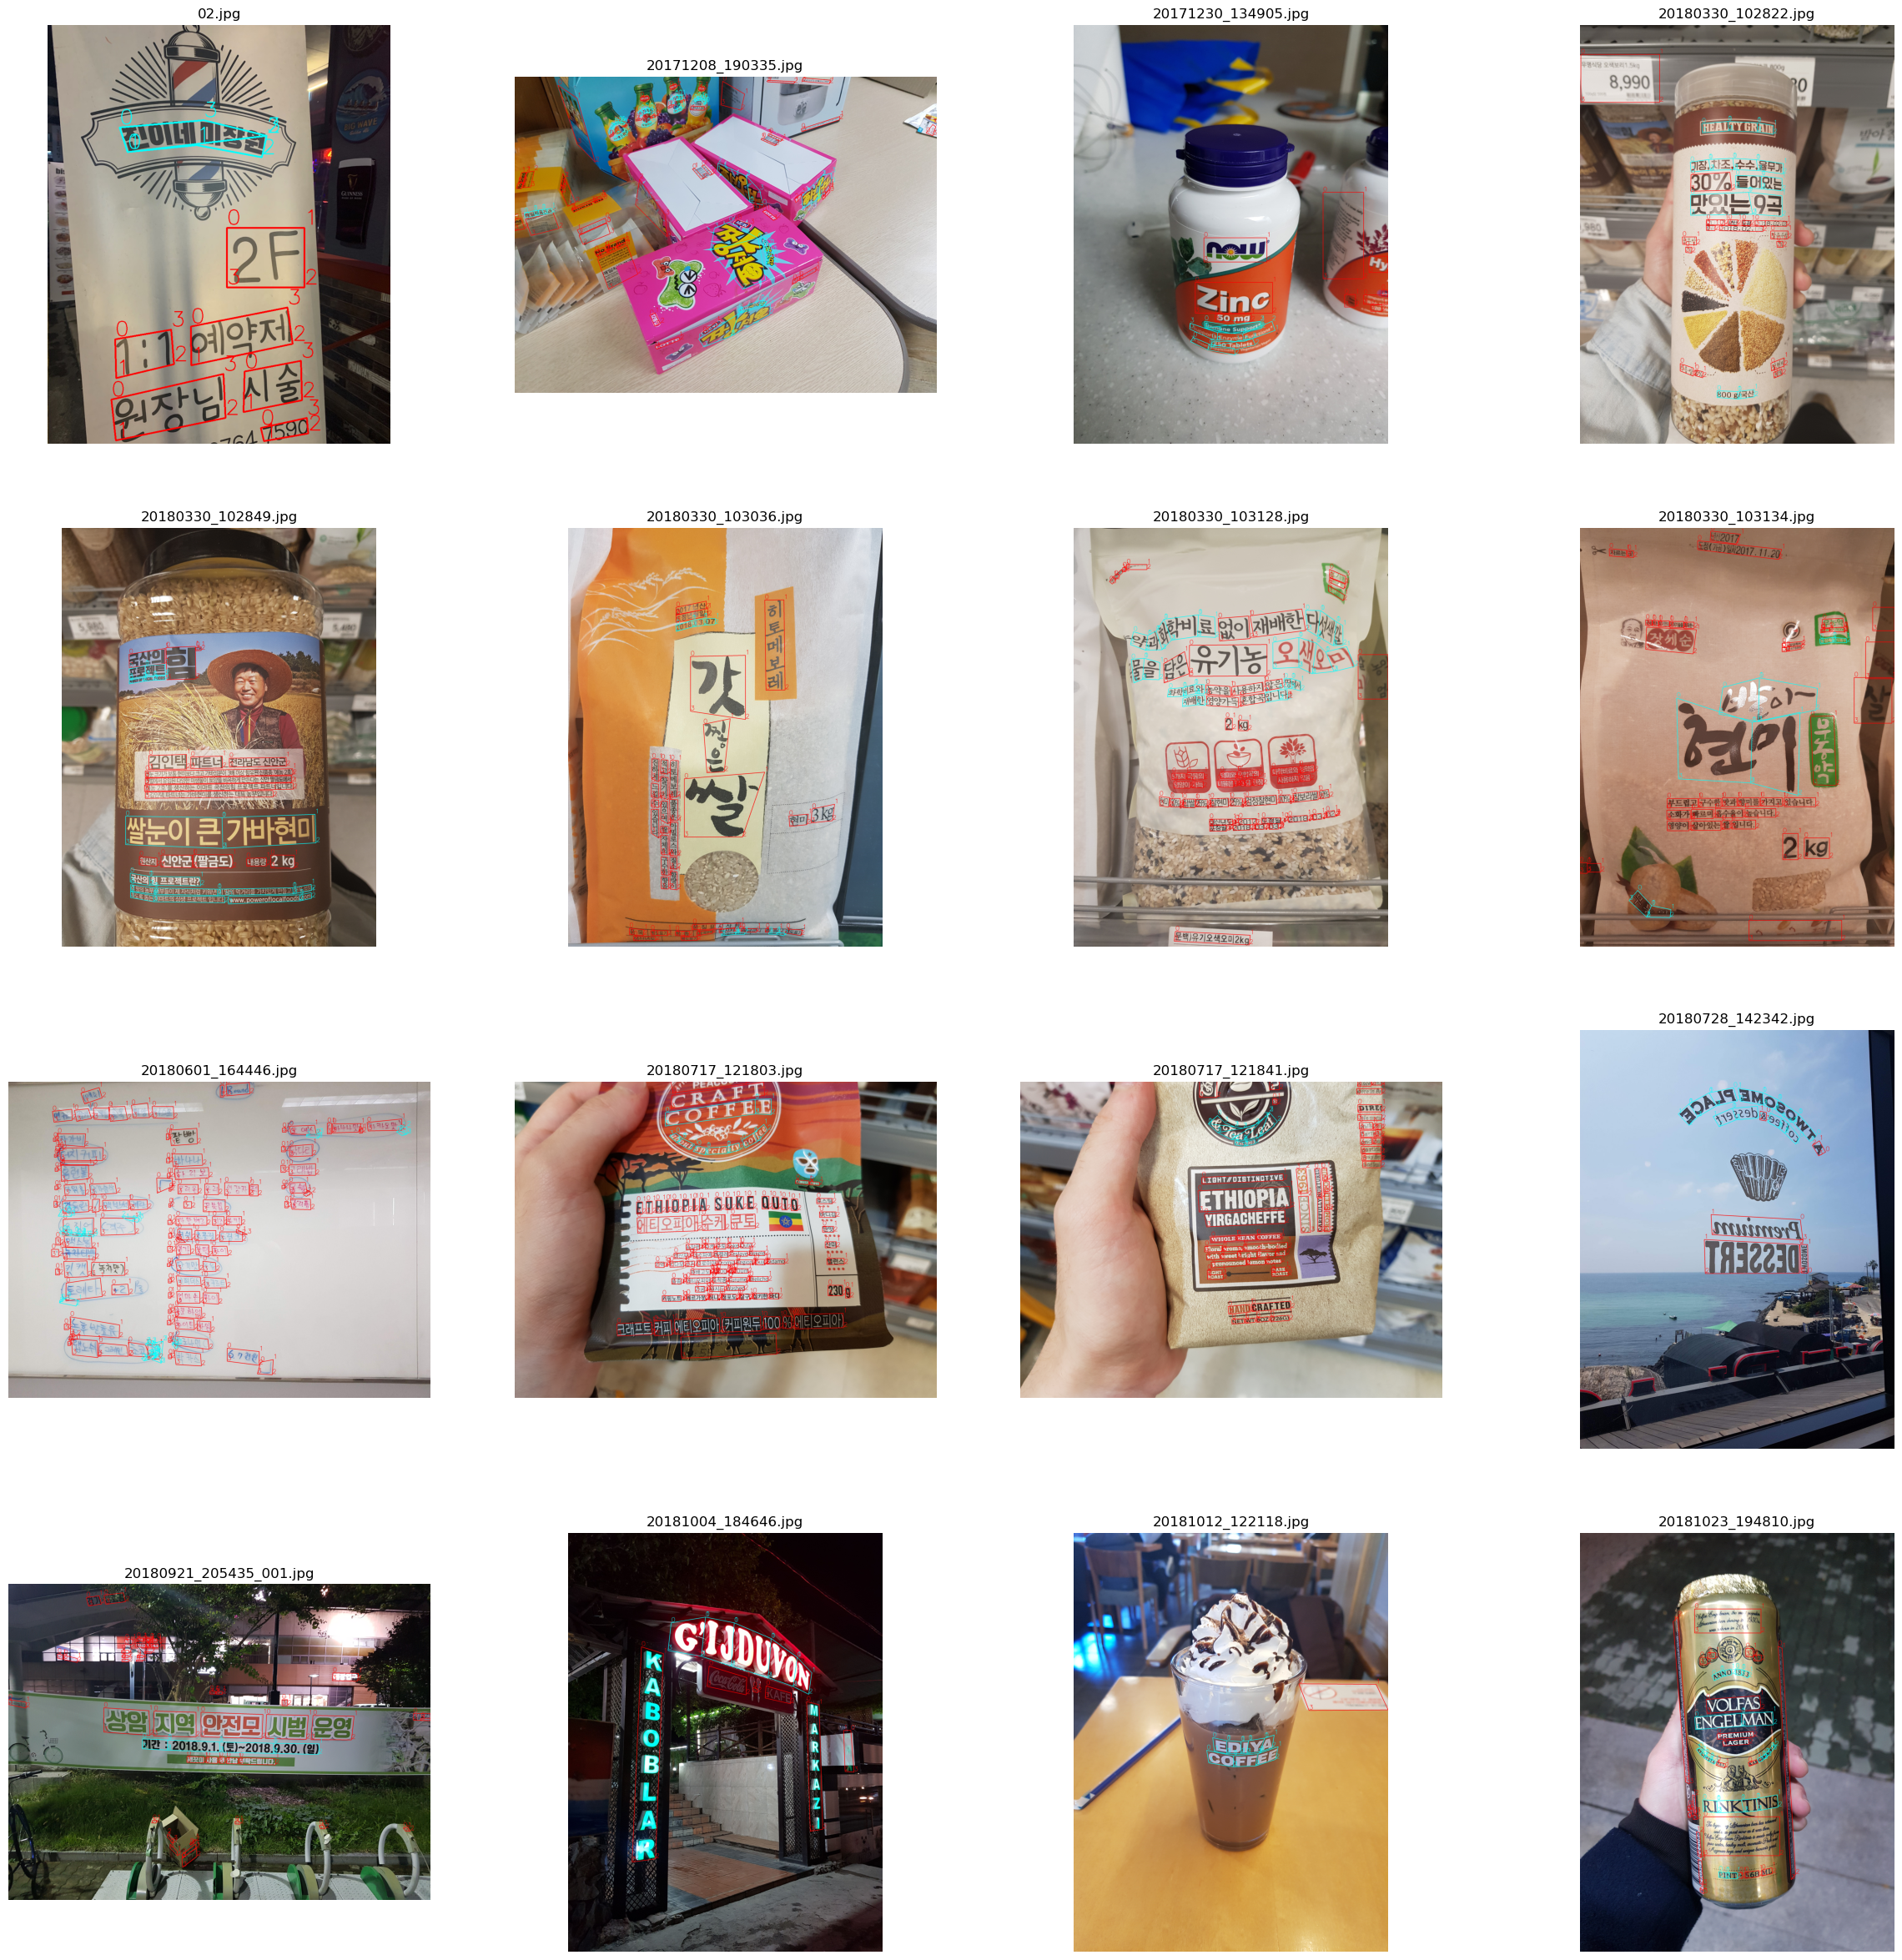

In [13]:
img_names = list(cands.keys())[:16]

pred_color = (0,0,255)
gt_color = (0,122,122)

fig, axes = plt.subplots(4,4,figsize=(30,30))

for i,img_name in enumerate(img_names):
    img = cv2.imread(os.path.join(data_dir,'images',img_name))

    for key, value in train_json['images'][img_name]['words'].items():
        points = np.array([[int(p[0]),int(p[1])] for p in value['points']])
        if len(points)>4:
            continue
        language = value['language']

        color = (255,255,0) if 'poly' in value['tags'] else (0,0,255)

        img = cv2.polylines(img, [points], True, color, 3)
        cv2.putText(img,"0",(points[0][0],points[0][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)
        cv2.putText(img,"1",(points[1][0],points[1][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)
        cv2.putText(img,"2",(points[2][0],points[2][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)
        cv2.putText(img,"3",(points[3][0],points[3][1]-10), cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)

    
    axes[i//4,i%4].set_title(img_name)
    axes[i//4,i%4].plot()
    axes[i//4,i%4].imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    axes[i//4,i%4].axis('off')
